# Reading dataset

In [ ]:
import pandas as pd
df_reviews = pd.read_csv('IMDB Dataset.csv')
df_reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
# take a sample of 10000 rows to make processing faster and get imbalance data
# 9000 positives
df_positive = df_reviews[df_reviews['sentiment']=='positive'][:9000]
# 1000 negatives
df_negative = df_reviews[df_reviews['sentiment']=='negative'][:1000]

In [ ]:
df_reviews_imb = pd.concat([df_positive, df_negative])

In [ ]:
df_reviews_imb.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

# Dealing with Imbalanced Classes

<Axes: xlabel='sentiment'>

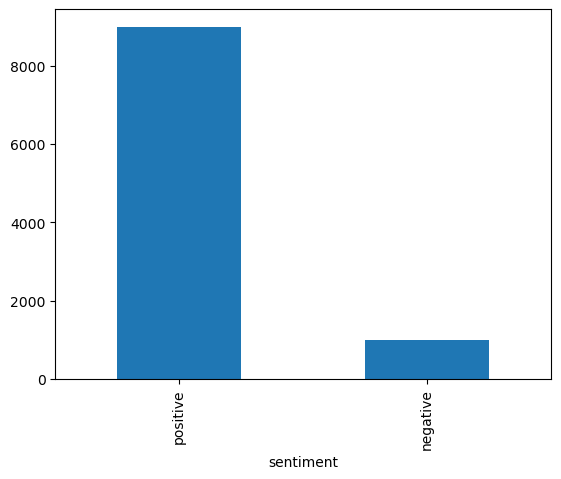

In [ ]:
# make a barplot to show how data is distributed
df_reviews_imb.value_counts('sentiment').plot(kind='bar')

# Balancing data with .sample()

In [ ]:
length_negative = len(df_reviews_imb[df_reviews_imb['sentiment']=='negative'])
df_reviews_positive = df_reviews_imb[df_reviews_imb['sentiment']=='positive'].sample(n=length_negative)
df_reviews_negative = df_reviews_imb[df_reviews_imb['sentiment']=='negative']
df_reviews_bal = pd.concat([df_reviews_positive, df_reviews_negative])
df_reviews_bal.reset_index(drop=True, inplace=True)
df_reviews_bal.value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

# Balancing data with RandomUnderSampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)


df_reviews_bal, df_reviews_bal['sentiment'] = rus.fit_resample(df_reviews_imb[['review']],
                                                             df_reviews_imb['sentiment'])
df_reviews_imb.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

In [ ]:
df_reviews_bal.value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

# Splitting data into train and test

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_reviews_bal, test_size=0.33,
                               random_state=42)
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']
train_x
train_y.value_counts()

sentiment
negative    675
positive    665
Name: count, dtype: int64

# Text Representation (Bag of Words)
## Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

df = pd.DataFrame({'review':['review1', 'review2'], 'text':text})
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['text'])

In [ ]:
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['review'].values,
                      columns=cv.get_feature_names_out())
# Changed to get_feature_names_out() which is the updated method name in newer scikit-learn versions
df_dtm

,code,hate,java,love,python,writing
review1,2,0,0,2,2,1
review2,2,2,2,0,0,1


# Tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

df = pd.DataFrame({'review':['review1', 'review2'], 'text':text})
tfidf = TfidfVectorizer(stop_words='english', norm=None)
tfidf_matrix = tfidf.fit_transform(df['text'])
pd.DataFrame(tfidf_matrix.toarray(), index=df['review'].values,
                      columns=tfidf.get_feature_names_out())

,code,hate,java,love,python,writing
review1,2.0,0.00000,0.00000,2.81093,2.81093,1.0
review2,2.0,2.81093,2.81093,0.00000,0.00000,1.0


# Turning our text data into numerical vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
test_x_vector = tfidf.transform(test_x)
train_x_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 118834 stored elements and shape (1340, 20625)>

In [ ]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,00,000,007,01pm,02,04,08,10,100,1000,...,zooming,zooms,zues,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,ísnt,ïn,ünfaithful
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
742,0,0,0,0,0,0,0,0.042791,0,0,...,0,0,0,0,0,0,0,0,0,0
9464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Selection
# Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [ ]:
print(svc.predict(tfidf.transform(['A good movie'])))
print(svc.predict(tfidf.transform(['An excellent movie'])))
print(svc.predict(tfidf.transform(['I did not like this movie at all I gave this movie away'])))

['positive']
['positive']
['negative']


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector, train_y)

LogisticRegression()

# Model Evaluation
# Confusion Matrix

In [ ]:
# calculate confusion matrix of svc
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y,
                 svc.predict(test_x_vector),
                 labels=['positive', 'negative'])

array([[290,  45],
       [ 60, 265]])

# Mean Accuracy

In [ ]:
# calculate accuracy of all models

print(svc.score(test_x_vector, test_y))
print(dec_tree.score(test_x_vector, test_y))
print(gnb.score(test_x_vector.toarray(), test_y))
print(log_reg.score(test_x_vector, test_y))


# model.score(test_x_vector, test_y)

0.8409090909090909
0.6530303030303031
0.6348484848484849
0.8303030303030303


# F1 Score

In [ ]:
from sklearn.metrics import f1_score

f1_score(test_y, svc.predict(test_x_vector),
         labels=['positive', 'negative'],
         average=None)

array([0.84671533, 0.83464567])

# Classification report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_y,
                      svc.predict(test_x_vector),
                      labels=['positive', 'negative'])
)

              precision    recall  f1-score   support

    positive       0.83      0.87      0.85       335
    negative       0.85      0.82      0.83       325

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



# Tuning the Model
# GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [1,4,8,16,32], 'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc, parameters, cv=5)
svc_grid.fit(train_x_vector, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [ ]:
svc_grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:
svc_grid.best_estimator_

SVC(C=1, kernel='linear')